<a href="https://github.com/varunjain3/NLMeansDenoising/blob/main/Assignment4_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2

In [2]:

def show_im(img):
    plt.imshow(img, cmap="gray")
    plt.show()


def MSE(Y, YH):
    Y = Y.astype(float)
    YH = YH.astype(float)
    return np.square(Y - YH).mean()


def PSNR(original, noisy, peak=100):
    mse = np.mean((original-noisy)**2)
    return 10*np.log10(peak*peak/mse)

In [ ]:
from adding_noise import create_noise
# creates the gt and noisy images
create_noise()

In [3]:
DATA_DIR = "Data"
noise_img = "sp_noise"  # "sp_noise" or "gaussian"

file = "Image3.png"

img_path = os.path.join("sp_noise",file)
gt_path = os.path.join("gt",file)
img = np.array(ImageOps.grayscale(Image.open(img_path)), dtype=float)
gt = np.array(ImageOps.grayscale(Image.open(gt_path))) 


In [13]:
gaussian_img = gaussian_smooth(img,3,5)
# For Gaussian smoothened Image 
print("\nMSE for Gaussian smoothened Image -\t", MSE(gt,gaussian_img))
print("PSNR for Gaussian smoothened Image -\t", PSNR(gt,gaussian_img))

nlmeans_img = NL_means(img,8)
# For NL_means denoising 
print("\nMSE for NL_means denoised Image -\t", MSE(gt,nlmeans_img))
print("PSNR for NL_means denoised Image -\t", PSNR(gt,nlmeans_img))

 98%|█████████▊| 63483/65025 [00:01<00:00, 52117.66it/s]
MSE for Gaussian smoothened Image -	 517.9519990583093
PSNR for Gaussian smoothened Image -	 12.857104864131532
65163it [00:08, 7419.52it/s]                           
MSE for NL_means denoised Image -	 95.7900754300726
PSNR for NL_means denoised Image -	 20.186794847547628
65536it [00:24, 7419.52it/s]

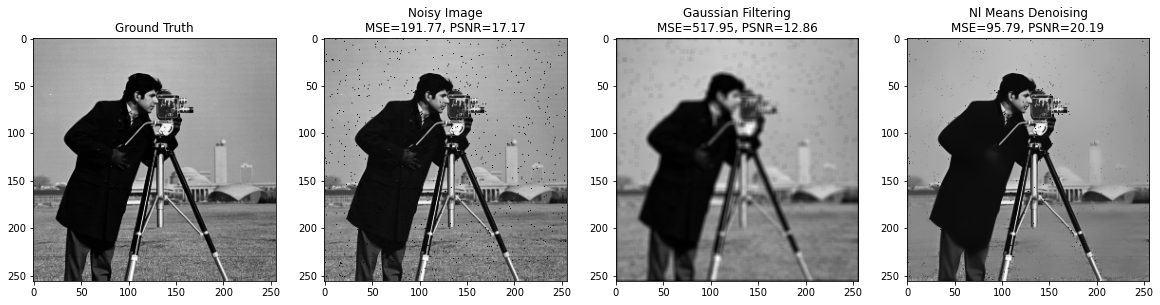

In [15]:

_, axs = plt.subplots(1,4,figsize=(20,20))
axs[0].imshow(gt,cmap='gray')
axs[0].title.set_text('Ground Truth')
axs[1].imshow(img,cmap='gray')
axs[1].title.set_text('Noisy Image\nMSE={0:.2f}, PSNR={1:.2f}'.format(MSE(gt,img),PSNR(gt,img)))
axs[2].imshow(gaussian_img,cmap='gray')
axs[2].title.set_text('Gaussian Filtering\nMSE={0:.2f}, PSNR={1:.2f}'.format(MSE(gt,gaussian_img),PSNR(gt,gaussian_img)))
axs[3].imshow(nlmeans_img,cmap='gray')
axs[3].title.set_text('Nl Means Denoising\nMSE={0:.2f}, PSNR={1:.2f}'.format(MSE(gt,nlmeans_img),PSNR(gt,nlmeans_img)))

plt.show()

65536

In [8]:
from NLmeans import NL_means
from gaussiansmoothing import gaussian_smooth